# Hospital Patient Analysis

In [44]:
# -----------------------------------
# STEP 1: Import Required Libraries
# -----------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("NumPy, Pandas, Matplotlib, and Seaborn were imported to perform numerical calculations, data manipulation, and data visualization.")


NumPy, Pandas, Matplotlib, and Seaborn were imported to perform numerical calculations, data manipulation, and data visualization.


In [46]:
# -----------------------------------
# STEP 2: Load Dataset 
# -----------------------------------
df = pd.read_csv("hospital_patients.csv")  
print("The hospital patient dataset was successfully loaded from a CSV file into a Pandas DataFrame.")
df



The hospital patient dataset was successfully loaded from a CSV file into a Pandas DataFrame.


,Patient_Name,Age,Gender,Disease,Department,Bill_Amount,Rating,Admission_Date
0,Amit Sharma,45,Male,Heart,Cardiology,75000,4.5,2025-01-10
1,Pooja Patil,30,Female,Fever,General,5000,4.0,2025-01-15
2,Rahul Verma,60,Male,Diabetes,Endocrinology,40000,4.2,2025-02-05
3,Sneha Kulkarni,25,Female,Infection,General,8000,3.8,2025-02-18
4,Rohit Singh,50,Male,Orthopedic,Orthopedic,60000,4.6,2025-03-02
5,Neha Joshi,35,Female,Fever,General,7000,4.1,2025-03-12
6,Karan Mehta,40,Male,Heart,Cardiology,90000,4.7,2025-04-08
7,Anita Deshmukh,55,Female,Diabetes,Endocrinology,45000,4.3,2025-04-20
8,Suresh Rao,65,Male,Heart,Cardiology,85000,4.8,2025-05-05
9,Priya Nair,28,Female,Infection,General,9000,3.9,2025-05-18


In [47]:
# -----------------------------------
# STEP 3: Understand the Data
# -----------------------------------
print(df.info())
print(df.describe())
print("The structure of the dataset, data types, and basic statistical information were examined to understand the overall data.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_Name    12 non-null     object 
 1   Age             12 non-null     int64  
 2   Gender          12 non-null     object 
 3   Disease         12 non-null     object 
 4   Department      12 non-null     object 
 5   Bill_Amount     12 non-null     int64  
 6   Rating          12 non-null     float64
 7   Admission_Date  12 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 900.0+ bytes
None
             Age   Bill_Amount     Rating
count  12.000000     12.000000  12.000000
mean   42.833333  41250.000000   4.283333
std    13.092908  33352.456636   0.332575
min    25.000000   5000.000000   3.800000
25%    32.250000   7750.000000   4.000000
50%    42.500000  42500.000000   4.250000
75%    51.250000  67500.000000   4.525000
max    65.000000  90000.000000   4.80000

In [48]:
# -----------------------------------
# STEP 4: Data Cleaning
# -----------------------------------
# Check missing values
print(df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert Admission_Date to datetime
df['Admission_Date'] = pd.to_datetime(df['Admission_Date'])
print("Missing values were checked, duplicate records were removed, and the admission date column was converted into datetime format to ensure accurate analysis.")

Patient_Name      0
Age               0
Gender            0
Disease           0
Department        0
Bill_Amount       0
Rating            0
Admission_Date    0
dtype: int64
Missing values were checked, duplicate records were removed, and the admission date column was converted into datetime format to ensure accurate analysis.


In [49]:
df['Month'] = df['Admission_Date'].dt.month
print("A new Month column was created from the Admission_Date column to analyze monthly patient admission trends.")

A new Month column was created from the Admission_Date column to analyze monthly patient admission trends.


In [50]:
# -----------------------------------
# STEP 5: NumPy Calculations
# -----------------------------------
print("Average Bill Amount:", np.mean(df['Bill_Amount']))
print("Maximum Bill Amount:", np.max(df['Bill_Amount']))
print("Minimum Bill Amount:", np.min(df['Bill_Amount']))
print("The average, maximum, and minimum bill amounts were calculated to understand hospital billing patterns.")

Average Bill Amount: 41250.0
Maximum Bill Amount: 90000
Minimum Bill Amount: 5000
The average, maximum, and minimum bill amounts were calculated to understand hospital billing patterns.


In [51]:
# -----------------------------------
# STEP 6: Disease-wise Analysis
# -----------------------------------
# Patient count per disease
print(df['Disease'].value_counts())

# Revenue per disease
disease_revenue = df.groupby('Disease')['Bill_Amount'].sum()
print(disease_revenue)
print("The number of patients for each disease and the total revenue generated by each disease were analyzed.")


Disease
Heart         3
Fever         3
Diabetes      2
Infection     2
Orthopedic    2
Name: count, dtype: int64
Disease
Diabetes       85000
Fever          18000
Heart         250000
Infection      17000
Orthopedic    125000
Name: Bill_Amount, dtype: int64
The number of patients for each disease and the total revenue generated by each disease were analyzed.


In [33]:
# -----------------------------------
# STEP 6: Disease-wise Analysis
# -----------------------------------
# Patient count per disease
print(df['Disease'].value_counts())

# Revenue per disease
disease_revenue = df.groupby('Disease')['Bill_Amount'].sum()
print(disease_revenue)


Disease
Heart         3
Fever         3
Diabetes      2
Infection     2
Orthopedic    2
Name: count, dtype: int64
Disease
Diabetes       85000
Fever          18000
Heart         250000
Infection      17000
Orthopedic    125000
Name: Bill_Amount, dtype: int64


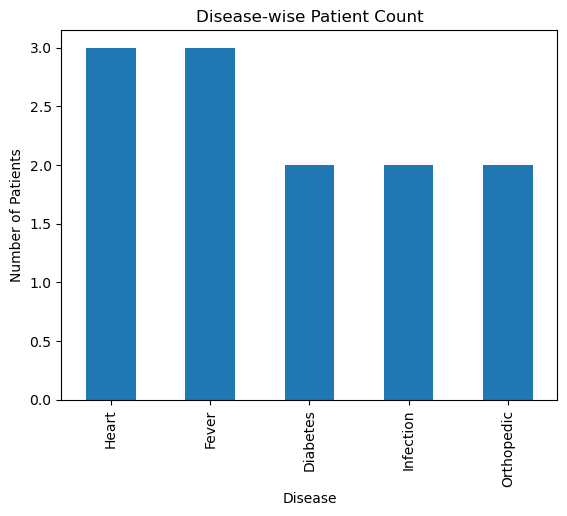

Bar charts and line charts were used to visually represent disease-wise patient count, monthly admission trends, and revenue by disease.


In [52]:
# -----------------------------------
# STEP 8: Visualization
# -----------------------------------

# 1. Disease-wise Patient Count (Bar Chart)
df['Disease'].value_counts().plot(kind='bar')
plt.title("Disease-wise Patient Count")
plt.xlabel("Disease")
plt.ylabel("Number of Patients")
plt.show()
print("Bar charts and line charts were used to visually represent disease-wise patient count, monthly admission trends, and revenue by disease.")


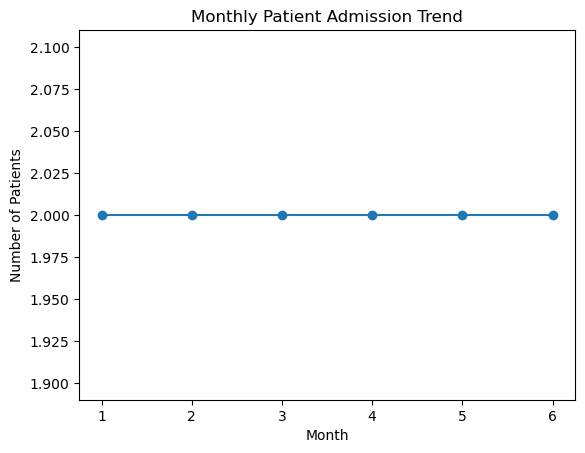

A pie chart was used to show the percentage distribution of male and female patients.


In [53]:
df.groupby('Month').size().plot(marker='o')
plt.title("Monthly Patient Admission Trend")
plt.xlabel("Month")
plt.ylabel("Number of Patients")
plt.show()
print("A pie chart was used to show the percentage distribution of male and female patients.")


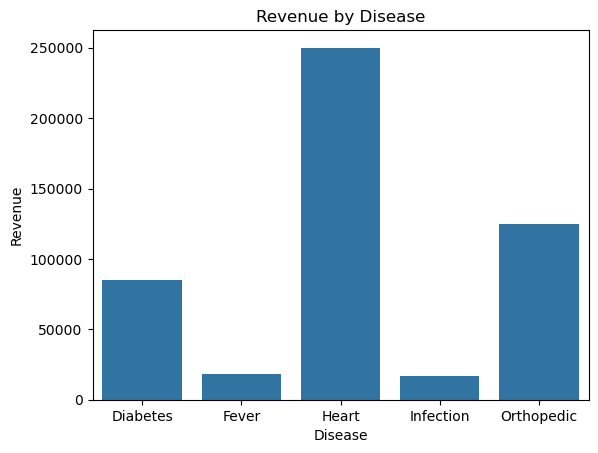

In [36]:
sns.barplot(x=disease_revenue.index, y=disease_revenue.values)
plt.title("Revenue by Disease")
plt.xlabel("Disease")
plt.ylabel("Revenue")
plt.show()


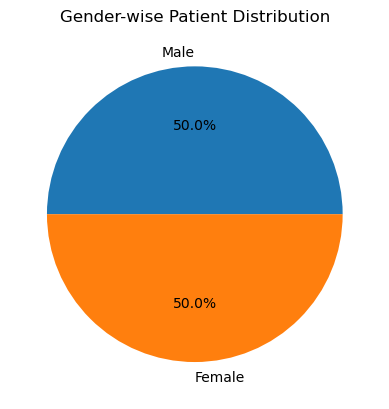

A pie chart was used to show the percentage distribution of male and female patients.


In [54]:
# -----------------------------------
# 1. Gender-wise Patient Analysis
# -----------------------------------
gender_count = df['Gender'].value_counts()

gender_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender-wise Patient Distribution")
plt.ylabel("")
plt.show()
print("A pie chart was used to show the percentage distribution of male and female patients.")

Age_Group
Young Adult    5
Adult          4
Senior         3
Child          0
Name: count, dtype: int64


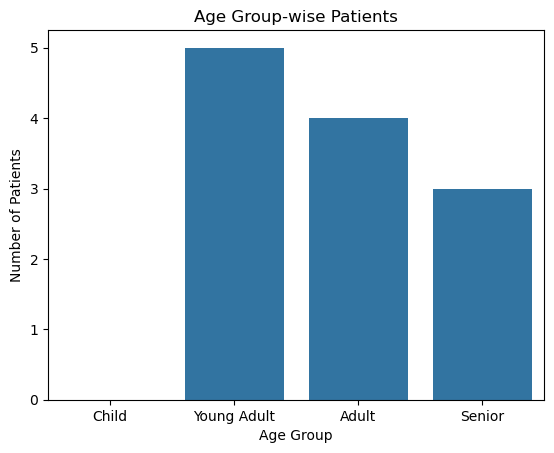

Patients were categorized into age groups to identify which age group had the highest number of admissions.


In [55]:
# -----------------------------------
# 2. Age Group Analysis
# -----------------------------------
bins = [0, 18, 35, 50, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

print(df['Age_Group'].value_counts())

sns.barplot(
    x=df['Age_Group'].value_counts().index,
    y=df['Age_Group'].value_counts().values
)
plt.title("Age Group-wise Patients")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.show()
print("Patients were categorized into age groups to identify which age group had the highest number of admissions.")

In [56]:
# -----------------------------------
# 3. Department-wise Analysis
# -----------------------------------
print(df['Department'].value_counts())

department_revenue = df.groupby('Department')['Bill_Amount'].sum()
print(department_revenue)
print("The patient count and total revenue for each hospital department were analyzed.")

Department
General          5
Cardiology       3
Endocrinology    2
Orthopedic       2
Name: count, dtype: int64
Department
Cardiology       250000
Endocrinology     85000
General           35000
Orthopedic       125000
Name: Bill_Amount, dtype: int64
The patient count and total revenue for each hospital department were analyzed.


Department
Cardiology       4.666667
Endocrinology    4.250000
General          3.960000
Orthopedic       4.550000
Name: Rating, dtype: float64


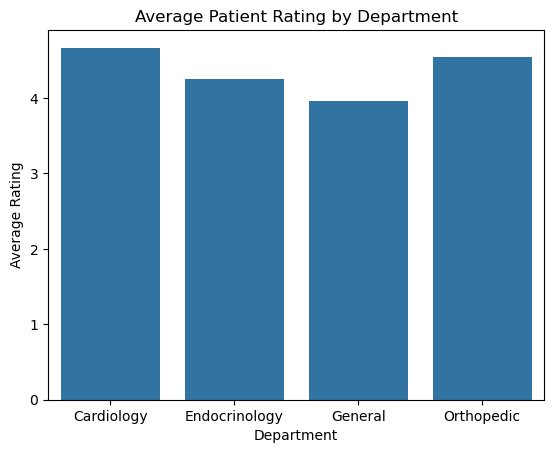

The average patient rating for each department was calculated to measure patient satisfaction levels.


In [57]:
# -----------------------------------
# 4. Patient Satisfaction (Rating Analysis)
# -----------------------------------
avg_rating = df.groupby('Department')['Rating'].mean()
print(avg_rating)

sns.barplot(
    x=avg_rating.index,
    y=avg_rating.values
)
plt.title("Average Patient Rating by Department")
plt.xlabel("Department")
plt.ylabel("Average Rating")
plt.show()
print("The average patient rating for each department was calculated to measure patient satisfaction levels.")


In [58]:
# -----------------------------------
# 5. High-Value Patients Analysis
# -----------------------------------
avg_bill = df['Bill_Amount'].mean()

high_value_patients = df[df['Bill_Amount'] > avg_bill]

print(high_value_patients[['Patient_Name', 'Disease', 'Bill_Amount']])
print("Patients with bill amounts higher than the average were identified as high-value patients.")

      Patient_Name     Disease  Bill_Amount
0      Amit Sharma       Heart        75000
4      Rohit Singh  Orthopedic        60000
6      Karan Mehta       Heart        90000
7   Anita Deshmukh    Diabetes        45000
8       Suresh Rao       Heart        85000
10     Vikas Gupta  Orthopedic        65000
Patients with bill amounts higher than the average were identified as high-value patients.
